In [83]:
import pandas as pd
import numpy as np
import csv

import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
def read_frames_from_csv(filename):
    frames = []
    current_frame = []

    with open(filename, 'r', newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            if not row:  # Blank row signals new frame
                if current_frame:
                    frames.append(np.array(current_frame, dtype=float))
                    current_frame = []
            else:
                current_frame.append([float(x) for x in row])

        # Add the last frame if file didn't end with a blank line
        if current_frame:
            frames.append(np.array(current_frame, dtype=float))

    return frames

# Usage
distance_matrices = read_frames_from_csv('distance_matrices.csv')
clusteriness_matrices = read_frames_from_csv('clusteriness_matrices.csv')
acceleration_clusteriness_matrices = read_frames_from_csv('acceleration_clusteriness_matrices.csv')

In [85]:
# average distances

distance_means = []
for matrix in distance_matrices:
    non_zero_values = matrix[matrix != 0]
    mean = np.mean(non_zero_values)
    distance_means.append(mean)

distance_means = np.array(distance_means)
inverse_distance_means = 1 / distance_means


# minimum distances
max_inv_dist_means = []
for matrix in distance_matrices:
    max_inv_dists = []
    for row in matrix:
        non_zeros = row[row != 0]
        non_zeros = 1 / non_zeros
        if non_zeros.size != 0:
            max_inv_dist = np.max(non_zeros)
            max_inv_dists.append(max_inv_dist)

    max_inv_dist_means.append(np.mean(max_inv_dists))

max_inverse_distance_means = np.array(max_inv_dist_means)


# average clusteriness

clusteriness_means = []
for matrix in clusteriness_matrices:
    non_zero_values = matrix[matrix != 0]
    mean = np.mean(non_zero_values)
    clusteriness_means.append(mean)

clusteriness_means = np.array(clusteriness_means)


# max clusteriness 

max_clusteriness_means = []
for matrix in clusteriness_matrices:
    max_clusterinesses = []
    for row in matrix:
        non_zeros = row[row != 0]
        if non_zeros.size != 0:
            max_clusteriness = np.max(non_zeros)
            max_clusterinesses.append(max_clusteriness)

    max_clusteriness_means.append(np.mean(max_clusterinesses))

max_clusteriness_means = np.array(max_clusteriness_means)


# average acceleration_clusteriness

acceleration_clusteriness_means = []
for matrix in acceleration_clusteriness_matrices:
    non_zero_values = matrix[matrix != 0]
    mean = np.mean(non_zero_values)
    acceleration_clusteriness_means.append(mean)

acceleration_clusteriness_means = np.array(acceleration_clusteriness_means)


# max acceleration_clusteriness 

max_acceleration_clusteriness_means = []
for matrix in acceleration_clusteriness_matrices:
    max_acceleration_clusterinesses = []
    for row in matrix:
        non_zeros = row[row != 0]
        if non_zeros.size != 0:
            max_acceleration_clusteriness = np.max(non_zeros)
            max_acceleration_clusterinesses.append(max_acceleration_clusteriness)

    max_acceleration_clusteriness_means.append(np.mean(max_acceleration_clusterinesses))

max_acceleration_clusteriness_means = np.array(max_acceleration_clusteriness_means)



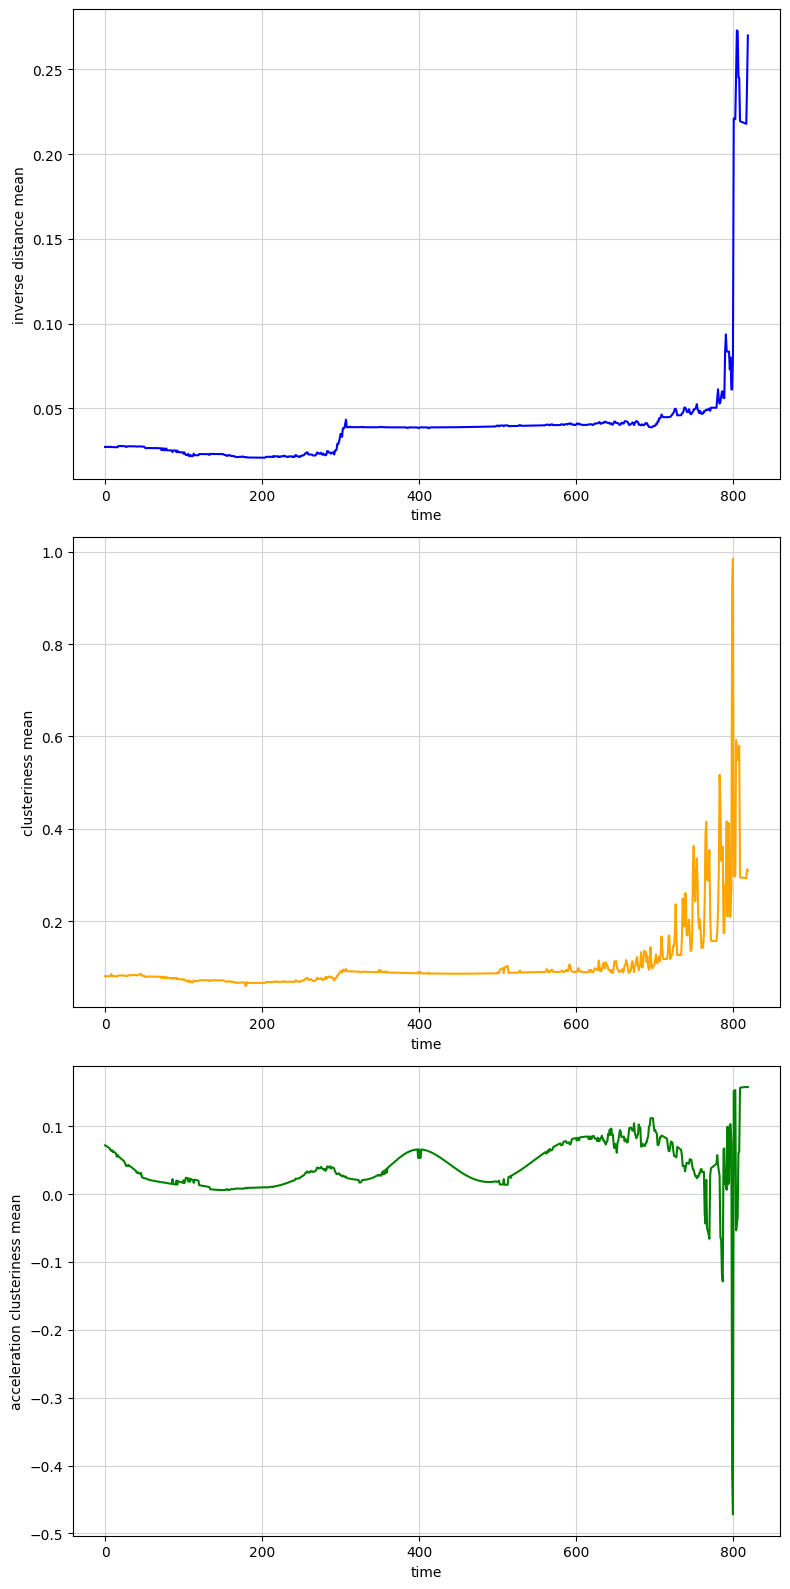

In [88]:
# Create the figure and a 1x2 grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 16))

# --- Subplot 1: Scatter Plot (Analogous to Figure S10 A) ---
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Plot the data
sns.lineplot(
    x=[i for i in range(len(inverse_distance_means))],
    y=inverse_distance_means,
    color='blue',
    ax=ax1
)

ax1.set_xlabel('time') 
ax1.set_ylabel('inverse distance mean')
ax1.grid(color='lightgrey')

sns.lineplot(
    x=[i for i in range(len(clusteriness_means))],
    y=clusteriness_means,
    color='orange',
    ax=ax2
)

ax2.set_xlabel('time') 
ax2.set_ylabel('clusteriness mean')
ax2.grid(color='lightgrey')

sns.lineplot(
    x=[i for i in range(len(acceleration_clusteriness_means))],
    y=acceleration_clusteriness_means,
    color='green',
    ax=ax3
)

ax3.set_xlabel('time') 
ax3.set_ylabel('acceleration clusteriness mean')
ax3.grid(color='lightgrey')



# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

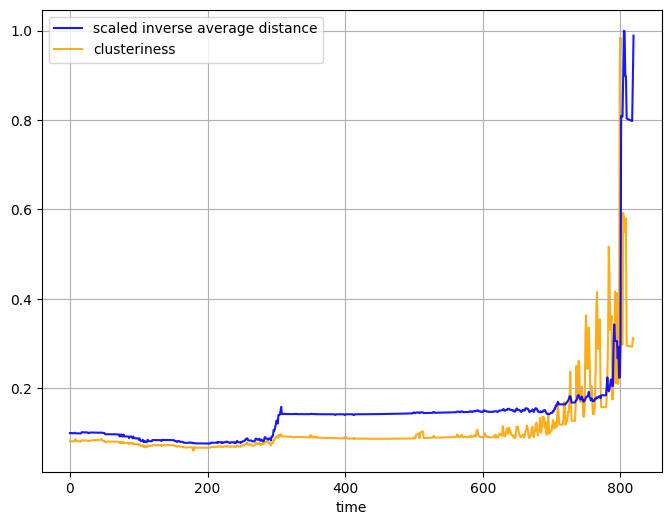

In [80]:
fig = plt.figure(figsize=(8, 6))

sns.lineplot(
    x=[i for i in range(len(distance_means))],
    y= inverse_distance_means / np.max(inverse_distance_means),
    color='blue',
    alpha=.9,
    label='scaled inverse average distance',
    zorder=2,
)

sns.lineplot(
    x=[i for i in range(len(distance_means))],
    y=clusteriness_means,
    color='orange',
    alpha=.9,
    label='clusteriness',
    zorder=1,
)

plt.xlabel('time')
plt.grid('lightgrey')

plt.show()

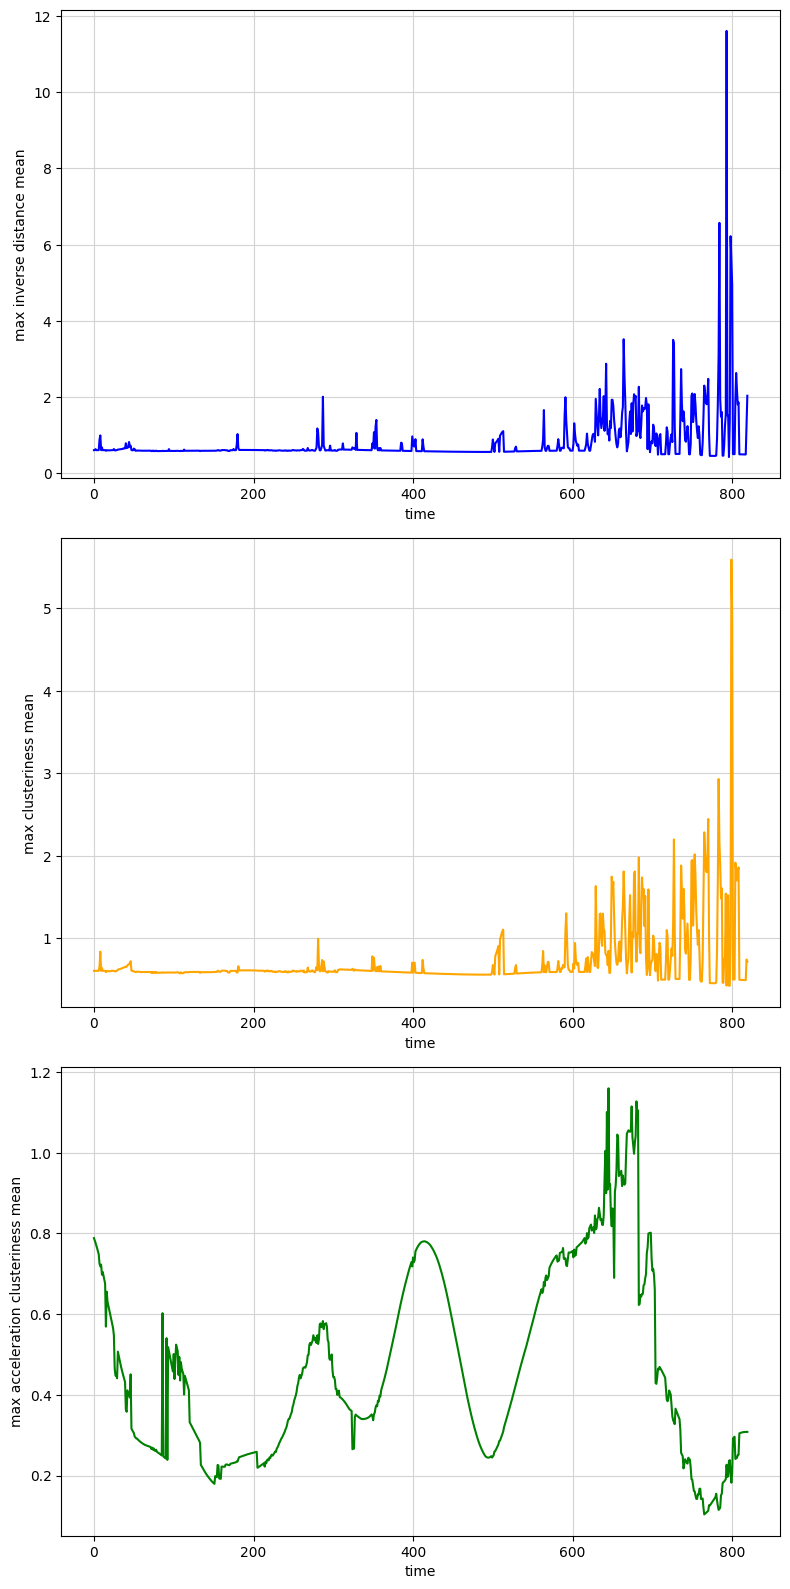

In [89]:
# Create the figure and a 1x2 grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 16))

# --- Subplot 1: Scatter Plot (Analogous to Figure S10 A) ---
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Plot the data
sns.lineplot(
    x=[i for i in range(len(max_inverse_distance_means))],
    y=max_inverse_distance_means,
    color='blue',
    ax=ax1
)

ax1.set_xlabel('time') 
ax1.set_ylabel('max inverse distance mean')
ax1.grid(color='lightgrey')

sns.lineplot(
    x=[i for i in range(len(max_clusteriness_means))],
    y=max_clusteriness_means,
    color='orange',
    ax=ax2
)

ax2.set_xlabel('time') 
ax2.set_ylabel('max clusteriness mean')
ax2.grid(color='lightgrey')


sns.lineplot(
    x=[i for i in range(len(max_acceleration_clusteriness_means))],
    y=max_acceleration_clusteriness_means,
    color='green',
    ax=ax3
)

ax3.set_xlabel('time') 
ax3.set_ylabel('max acceleration clusteriness mean')
ax3.grid(color='lightgrey')


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

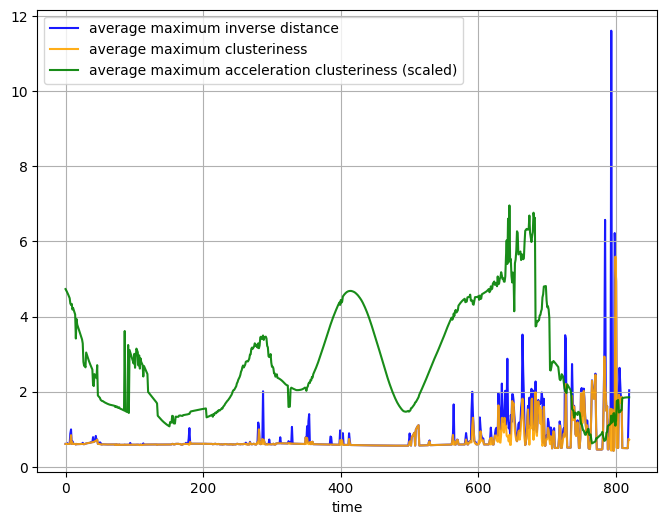

In [92]:
fig = plt.figure(figsize=(8, 6))

sns.lineplot(
    x=[i for i in range(len(max_inverse_distance_means))],
    y=max_inverse_distance_means,
    color='blue',
    alpha=.9,
    label='average maximum inverse distance',
    zorder=1,
)

sns.lineplot(
    x=[i for i in range(len(max_clusteriness_means))],
    y=max_clusteriness_means,
    color='orange',
    alpha=.9,
    label='average maximum clusteriness',
    zorder=2,
)

sns.lineplot(
    x=[i for i in range(len(max_acceleration_clusteriness_means))],
    y=max_acceleration_clusteriness_means * 6,
    color='green',
    alpha=.9,
    label='average maximum acceleration clusteriness (scaled)',
    zorder=3,
)


plt.xlabel('time')
plt.grid('lightgrey')

plt.show()

We want to use some kind of measure to evaluate if two birds were in a flock. For this we could use the average distance or the average distance deviation / total distance deviation between two birds.

**We will first try the average distance**

In [128]:
# birds spent time together when their distance is not 0
number_of_frames_birds_spent_simultaneously = np.zeros(distance_matrices[0].shape)

for matrix in distance_matrices:
    for i in range(number_of_frames_birds_spent_simultaneously.shape[0]):
        for j in range(number_of_frames_birds_spent_simultaneously.shape[1]):
            if matrix[i][j] != 0:
                number_of_frames_birds_spent_simultaneously[i][j] += 1

# replace 0 values by infinity to avoid division errors
for i in range(number_of_frames_birds_spent_simultaneously.shape[0]):
    for j in range(number_of_frames_birds_spent_simultaneously.shape[1]):
        if number_of_frames_birds_spent_simultaneously[i][j] == 0:
            number_of_frames_birds_spent_simultaneously[i][j] = np.inf



# compute average distances between birds
average_distances_between_birds = np.zeros(distance_matrices[0].shape)

for matrix in distance_matrices:
    average_distances_between_birds += matrix


average_distances_between_birds = average_distances_between_birds / number_of_frames_birds_spent_simultaneously


# compute average clusteriness of two birds
average_clusteriness_between_birds = np.zeros(clusteriness_matrices[0].shape)

for matrix in clusteriness_matrices:
    average_clusteriness_between_birds += matrix

average_clusteriness_between_birds = average_clusteriness_between_birds / number_of_frames_birds_spent_simultaneously



print(average_distances_between_birds)

[[ 0.         80.26585025 69.77726163 ...  0.          0.
   0.        ]
 [80.26585025  0.         14.99489489 ...  0.          0.
   0.        ]
 [69.77726163 14.99489489  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.22820447]
 [ 0.          0.          0.         ...  0.          0.22820447
   0.        ]]


In [137]:
# TODO: This sorting is not correct and likely leads to wrong results! Fix it pls!
# sort index mapping from high correlation colors
sorted_indices = np.argsort(average_distances_between_birds, axis=0)

heatmap_distances = np.take_along_axis(average_distances_between_birds, sorted_indices, axis=0)
heatmap_clusteriness = np.take_along_axis(average_clusteriness_between_birds, sorted_indices, axis=0)


<Axes: >

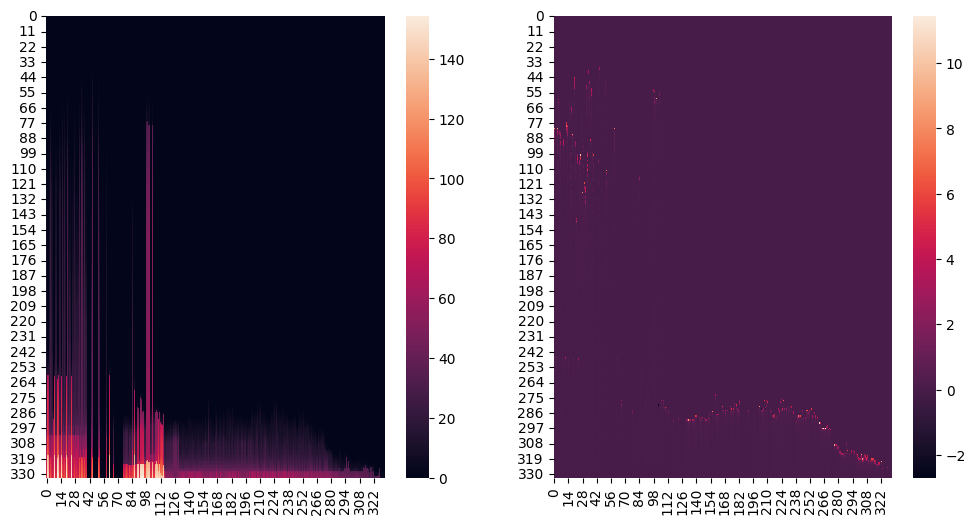

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(
    data=heatmap_distances,
    ax=ax[0]
)

sns.heatmap(
    data=heatmap_clusteriness,
    ax=ax[1]
)